# AML Assignment 1
# Supreet Singh - CS16BTECH11038
## (Please run using python3).

## Q1.

### (a) 
Training error decreases as K is varied from N to 1. At K=1, training error = 0, because the nearest distance point is that point itself.

### (b)
Generalisation error first decreases, then increases as K is varied from N to 1. At K=N, it would take close to the global maximum vote for classification, and at K=1, it would fit noisy data also. 

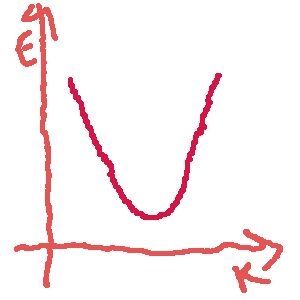

### (c)
1. At higher dimensions, euclidean distance is almost meaningless. It is highly likely that the distance to the closest point and the farthest point (from a given point) are approximately equal in magnitude, thus making the concept of nearest neighbor meaningless. 
2. In higher dimensions, some dimensions may not be relevant to classification at all, but still their effect would appear in the model and may lead to wrong classifications.

### (d)
It is not possible to build a decision tree that classifies the same as 1-NN, because 1-NN makes decision boundaries that are  Voronoi Diagrams (curved boundaries), whereas decision trees make boundaries which are lines parallel to the axes. Since their decision boundaries are not same, the cannot classifiy exactly the same.

## Q2.


### (b)
Naive Baye's assumption: Each attribute occurs independently, and each class is equally likely,

and $$ \begin{equation*} P(politics | X)  = \frac{P(X|politics).P(politics)}{P(X)} \end{equation*} $$
where P(politics) = 1/2, 

probability that the document is from politics (after simplification) is: $ \frac{5^{4}.4}{3^{8}} $ = 0.381

## Q3.
At each step, we need to maximize the information gain, or minimize the combined entropy of children nodes. 

### (a) Note: Written in Python3.
(The first cell below this contains the code common to each run with different test sets for cross validation.


In [63]:
# CS6510 HW 1 Code Skeleton
# Please use this outline to implement your decision tree. You can add any code around this.

import csv
import sys
import math

# Enter You Name Here
myname = "Supreet" # or "Doe-Jane-"

class Node():
    left = None
    right = None
    ans = 2 # 2 means none, 0,1 -> the classification
    attrib = 0 #index of attribute to split on
    val = 0 #the value to split on. 
    def __init__(self, a, v, q):
        self.attrib = a
        self.val = v
        self.ans = q
        
    def isLeaf(self): #boolean
        if self.ans == 2:
            return True
        else:
            return False
        

# Implement your decision tree below
class DecisionTree():
    tree = Node(0, 0, 2)
    
    def splitVal(self, data, idx): # retuurns mean
        sum = 0.0
        for x in data:
            sum = sum+ float(x[idx])
        
        return float(float(sum)/float(len(data)))
        
    def entropy(self, pa, na, ntot): #returns float.
        if pa == 1 or pa == 0:
            return 0
        
        
        e = float(pa) * float(math.log(pa, 2))
        e = e + float((1-pa) * math.log(1-pa, 2))
        
        return float(-1)*(float(na)/float(ntot))*e
        
    
    def prob1(self, data): #Probability of items to be in class 1.
        if len(data) == 0:
            return float(0)
        
        sum = 0
        for x in data:
            sum = sum + int(x[11]) # 11th index (12th elem) is the quality
        
        g= float(float(sum)/float(len(data)))
        return g
    
    def learn(self, training_set): #returns a node with the split conditions.
        # implement this function
         
        if len(training_set) == 0:
            return None
        
        tpl = self.splitNode(training_set)
        root = Node(tpl[1], tpl[2], 2)
        
        #print("got tuple to split: @ attrib: %d, value: %f" % (root.attrib, root.val) )
        
        if self.prob1(training_set) == 1 :
            root.ans = 1
            return root
        
        elif self.prob1(training_set) == 0:
            root.ans = 0
            return root
        
        else:
            l1 = [x for x in training_set if float(x[root.attrib]) <= root.val]
            l2 = [x for x in training_set if float(x[root.attrib]) > root.val]
            #print("left: %d, right %d" %(len(l1), len(l2)))
            root.left = self.learn(l1)
            root.right = self.learn(l2)
            return root

    # implement this function
    def classify(self, test_instance):
        #result = 0 # baseline: always classifies as 0
        result = self.treeTraverse(test_instance, self.tree)
        return result
    
    def treeTraverse(self, x_vector, node: Node) -> int:
        if node is None:
            return -1
        elif not node.isLeaf():
            return node.ans
        elif float(x_vector[node.attrib]) <= node.val:
            return self.treeTraverse(x_vector, node.left)
        else:
            return self.treeTraverse(x_vector, node.right)
            
        
    
    def splitNode(self, data): # returns the minimum entropy.
        me = float(11000)
        index = 0
        Nm = len(data)
        mSVal = 0.0
        
        for i in range(11): # 11 is the number of attributes 
            sv = self.splitVal(data, i)
            l1 = [x for x in data if float(x[i]) <= sv]
            l2 = [x for x in data if float(x[i]) > sv]
            pa1 = self.prob1(l1)
            pa2 = self.prob1(l2)
            
            eThis = self.entropy(pa1, len(l1), Nm) + self.entropy(pa2, len(l2), Nm)
            #print("Entropy got: %f, me was: " % eThis, me)
            #print(eThis < me)
                
            if eThis < me:
                me = eThis
                index = i
                mSVal = sv
            '''
            me = eThis if eThis < me else me
            index = i if eThis < me else index
            print("inedx now is: %d" % index)
            mSVal = sv if eThis < me else mSVal
            '''
            
            #min = eThis < min ? eThis : min
        return (me, index, mSVal)
  

In [64]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 9]
    test_set = [x for i, x in enumerate(data) if i % K == 9]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8323


### Number of records: 4898

### accuracy: 0.8323

### (b) Cross Validation.
Part (a) has been run on 1 set of data. To run these, you need to run the first cell in part (a). 

Below is the code for the other the remaining 9 parts.

In [77]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 8]
    test_set = [x for i, x in enumerate(data) if i % K == 8]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8323


In [67]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 7]
    test_set = [x for i, x in enumerate(data) if i % K == 7]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8306


In [68]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 6]
    test_set = [x for i, x in enumerate(data) if i % K == 6]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8388


In [69]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 5]
    test_set = [x for i, x in enumerate(data) if i % K == 5]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8245


In [70]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 4]
    test_set = [x for i, x in enumerate(data) if i % K == 4]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8531


In [71]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 3]
    test_set = [x for i, x in enumerate(data) if i % K == 3]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8327


In [72]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 2]
    test_set = [x for i, x in enumerate(data) if i % K == 2]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8286


In [73]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 1]
    test_set = [x for i, x in enumerate(data) if i % K == 1]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8469


In [74]:
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 0]
    test_set = [x for i, x in enumerate(data) if i % K == 0]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()

Number of records: 4898
accuracy: 0.8408


#### Average of these 10 fold errors:
= 0.83647

### (c)

#### Using gini index: (This cell is standalone)


In [76]:
# CS6510 HW 1 Code Skeleton
# Please use this outline to implement your decision tree. You can add any code around this.

import csv
import sys
import math

# Enter You Name Here
myname = "Supreet" # or "Doe-Jane-"

class Node():
    left = None
    right = None
    ans = 2 # 2 means none, 0,1 -> the classification
    attrib = 0 #index of attribute to split on
    val = 0 #the value to split on. 
    def __init__(self, a, v, q):
        self.attrib = a
        self.val = v
        self.ans = q
        
    def isLeaf(self): #boolean
        if self.ans == 2:
            return True
        else:
            return False
        

# Implement your decision tree below
class DecisionTree():
    tree = Node(0, 0, 2)
    
    def splitVal(self, data, idx): # retuurns mean
        sum = 0.0
        for x in data:
            sum = sum+ float(x[idx])
        
        return float(float(sum)/float(len(data)))
        
    def entropy(self, pa, na, ntot): #Actully Gini index
        if pa == 1 or pa == 0:
            return 0
        
        e = float(2)*pa*(1-pa)
       
        
        return float(1)*(float(na)/float(ntot))*e
        
    
    def prob1(self, data): #Probability of items to be in class 1.
        if len(data) == 0:
            return float(0)
        
        sum = 0
        for x in data:
            sum = sum + int(x[11]) # 11th index (12th elem) is the quality
        
        g= float(float(sum)/float(len(data)))
        return g
    
    def learn(self, training_set): #returns a node with the split conditions.
        # implement this function
         
        if len(training_set) == 0:
            return None
        
        tpl = self.splitNode(training_set)
        root = Node(tpl[1], tpl[2], 2)
        
        #print("got tuple to split: @ attrib: %d, value: %f" % (root.attrib, root.val) )
        
        if self.prob1(training_set) == 1 :
            root.ans = 1
            return root
        
        elif self.prob1(training_set) == 0:
            root.ans = 0
            return root
        
        else:
            l1 = [x for x in training_set if float(x[root.attrib]) <= root.val]
            l2 = [x for x in training_set if float(x[root.attrib]) > root.val]
            #print("left: %d, right %d" %(len(l1), len(l2)))
            root.left = self.learn(l1)
            root.right = self.learn(l2)
            return root

    # implement this function
    def classify(self, test_instance):
        #result = 0 # baseline: always classifies as 0
        result = self.treeTraverse(test_instance, self.tree)
        return result
    
    def treeTraverse(self, x_vector, node: Node) -> int:
        if node is None:
            return -1
        elif not node.isLeaf():
            return node.ans
        elif float(x_vector[node.attrib]) <= node.val:
            return self.treeTraverse(x_vector, node.left)
        else:
            return self.treeTraverse(x_vector, node.right)
            
        
    
    def splitNode(self, data): # returns the minimum entropy.
        me = float(11000)
        index = 0
        Nm = len(data)
        mSVal = 0.0
        
        for i in range(11): # 11 is the number of attributes 
            sv = self.splitVal(data, i)
            l1 = [x for x in data if float(x[i]) <= sv]
            l2 = [x for x in data if float(x[i]) > sv]
            pa1 = self.prob1(l1)
            pa2 = self.prob1(l2)
            
            eThis = self.entropy(pa1, len(l1), Nm) + self.entropy(pa2, len(l2), Nm)
            #print("Entropy got: %f, me was: " % eThis, me)
            #print(eThis < me)
                
            if eThis < me:
                me = eThis
                index = i
                mSVal = sv
            '''
            me = eThis if eThis < me else me
            index = i if eThis < me else index
            print("inedx now is: %d" % index)
            mSVal = sv if eThis < me else mSVal
            '''
            
            #min = eThis < min ? eThis : min
        return (me, index, mSVal)
    
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 1]
    test_set = [x for i, x in enumerate(data) if i % K == 1]
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()
  

Number of records: 4898
accuracy: 0.8531


* Compared to entropy, using gini index resulted in very slightly better accuracy (0.8531 - gini vs 0.84 - entropy).

However, computation time taken using gini index is lower, because logarithms take more time to compute. Also, in this case (2 classes), a closed form solution : $ gini = 2.P(a).(1-P(a)) $ exists. 

#### Pre - Pruning

In [103]:
# CS6510 HW 1 Code Skeleton
# Please use this outline to implement your decision tree. You can add any code around this.

import csv
import sys
import math

# Enter You Name Here
myname = "Supreet" # or "Doe-Jane-"

class Node():
    left = None
    right = None
    ans = 2 # 2 means none, 0,1 -> the classification
    attrib = 0 #index of attribute to split on
    val = 0 #the value to split on. 
    
    class1 = 0
    class0 = 0
    
    def __init__(self, a, v, q):
        self.attrib = a
        self.val = v
        self.ans = q
        
    def isLeaf(self): #boolean
        if self.ans == 2:
            return True
        else:
            return False
        

# Implement your decision tree below
class DecisionTree():
    tree = Node(0, 0, 2)
    
    def splitVal(self, data, idx): # retuurns mean
        sum = 0.0
        for x in data:
            sum = sum+ float(x[idx])
        
        return float(float(sum)/float(len(data)))
        
    def entropy(self, pa, na, ntot): #Actully Gini index
        if pa == 1 or pa == 0:
            return 0
        
        e = float(2)*pa*(1-pa)
       
        
        return float(1)*(float(na)/float(ntot))*e
        
    
    def prob1(self, data): #Probability of items to be in class 1.
        if len(data) == 0:
            return float(0)
        
        sum = 0
        for x in data:
            sum = sum + int(x[11]) # 11th index (12th elem) is the quality
        
        g= float(float(sum)/float(len(data)))
        return g
    
    def learn(self, training_set): #returns a node with the split conditions.
        # implement this function
         
        if len(training_set) == 0:
            return None
        
        tpl = self.splitNode(training_set)
        root = Node(tpl[1], tpl[2], 2)
        
        #print("got tuple to split: @ attrib: %d, value: %f" % (root.attrib, root.val) )
        
        if self.prob1(training_set) >= 0.95:
            root.ans = 1
            root.class1 = 1
            return root
        
        elif self.prob1(training_set) <= 0.05:
            root.ans = 0
            root.class0 = 0
            return root
        
        else:
            l1 = [x for x in training_set if float(x[root.attrib]) <= root.val]
            l2 = [x for x in training_set if float(x[root.attrib]) > root.val]
            #print("left: %d, right %d" %(len(l1), len(l2)))
            root.left = self.learn(l1)
            root.right = self.learn(l2)
            
            #for pruning purposes. 
            if not root.left is None:
                root.class1 += root.left.class1
                root.class0 += root.left.class0
            
            if not root.right is None:
                root.class1 += root.right.class1
                root.class0 += root.right.class0
            
            return root

    # implement this function
    def classify(self, test_instance):
        #result = 0 # baseline: always classifies as 0
        result = self.treeTraverse(test_instance, self.tree)
        return result
    
    def treeTraverse(self, x_vector, node: Node) -> int:
        if node is None:
            return -1
        elif not node.isLeaf():
            return node.ans
        elif float(x_vector[node.attrib]) <= node.val:
            return self.treeTraverse(x_vector, node.left)
        else:
            return self.treeTraverse(x_vector, node.right)
            
        
    
    def splitNode(self, data): # returns the minimum entropy.
        me = float(11000)
        index = 0
        Nm = len(data)
        mSVal = 0.0
        
        for i in range(11): # 11 is the number of attributes 
            sv = self.splitVal(data, i)
            l1 = [x for x in data if float(x[i]) <= sv]
            l2 = [x for x in data if float(x[i]) > sv]
            pa1 = self.prob1(l1)
            pa2 = self.prob1(l2)
            
            eThis = self.entropy(pa1, len(l1), Nm) + self.entropy(pa2, len(l2), Nm)
            #print("Entropy got: %f, me was: " % eThis, me)
            #print(eThis < me)
                
            if eThis < me:
                me = eThis
                index = i
                mSVal = sv
            '''
            me = eThis if eThis < me else me
            index = i if eThis < me else index
            print("inedx now is: %d" % index)
            mSVal = sv if eThis < me else mSVal
            '''
            
            #min = eThis < min ? eThis : min
        return (me, index, mSVal)
    
    def pruneTree(self, maxChild: int, pruneSet) -> bool:
        node = self.tree
        
        self.pruneHelper(maxChild, node)
        
        results = []
        for instance in pruneSet:
            result = self.classify( instance[:-1] )
            results.append( (result) == int(instance[-1]))
            #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))
        
        # Accuracy
        accuracy = float(results.count(True))/float(len(results))
        print ("prune: accuracy: %.4f" % accuracy)       
        
                
    def pruneHelper(self, maxChild, node):
        s = node.class1 + node.class0
        
        if s<=maxChild:
            node.ans = 1 if node.class1 >= node.class0 else 0
        
        else:
            self.pruneHelper(maxChild, node.left)
            self.pruneHelper(maxChild, node.right)
            
    
def run_decision_tree():

    # Load data set
    with open("wine-dataset.csv") as f:
        next(f, None)
        data = [tuple(line) for line in csv.reader(f, delimiter=",")]
    print ("Number of records: %d" % (len(data)))

    # Split training/test sets
    # You need to modify the following code for cross validation.
    K = 10
    training_set = [x for i, x in enumerate(data) if i % K != 2 ]
    test_set = [x for i, x in enumerate(data) if i % K == 2]
    
    
    tree = DecisionTree()
    # Construct a tree using training set
    tree.tree = tree.learn( training_set )

    
    # Classify the test set using the tree we just constructed
    results = []
    for instance in test_set:
        result = tree.classify( instance[:-1] )
        results.append( (result) == int(instance[-1]))
        #print ("Actual: %d, classified as: %d" %(int(instance[-1]), int(result)))

    
    # Accuracy
    accuracy = float(results.count(True))/float(len(results))
    print ("accuracy: %.4f" % accuracy)       
    

    # Writing results to a file (DO NOT CHANGE)
    f = open(myname+"result.txt", "w")
    f.write("accuracy: %.4f" % accuracy)
    f.close()


if __name__ == "__main__":
    run_decision_tree()
  

Number of records: 4898
accuracy: 0.8245


For prepruning, I have made leaf the nodes which had low entropy (probability of either class >= 0.95) - those nodes classify data points corresponding to the classes which they represent. 

This resulted in a slight boost in accuracy: no pruning accuracy was 0.8204 and accuracy after pruning was 0.8245.

This is because pruning decreases over-fitting the training data and allows for more variation in test data.